# Week 2 – t-SNE Visualization

## Objective
Visualize high-dimensional image data in 2D using **t-SNE**.

**Note:** t-SNE is for visualization only.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist


2025-12-27 15:38:37.809751: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-27 15:38:37.855614: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-27 15:38:39.247287: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


## Step 1: Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Labels shape:", y_train.shape)


Training data shape: (60000, 28, 28)
Labels shape: (60000,)


## Step 2: Preprocess

In [3]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)

print("Flattened shape:", X_train_flat.shape)


Flattened shape: (60000, 784)


## Step 3: Apply t-SNE

In [7]:
n_samples = 2000
X_subset = X_train_flat[:n_samples]
y_subset = y_train[:n_samples]

print("Subset shape:", X_subset.shape)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    max_iter=1000
)

X_tsne = tsne.fit_transform(X_subset)


Subset shape: (2000, 784)


## Step 4: Visualization

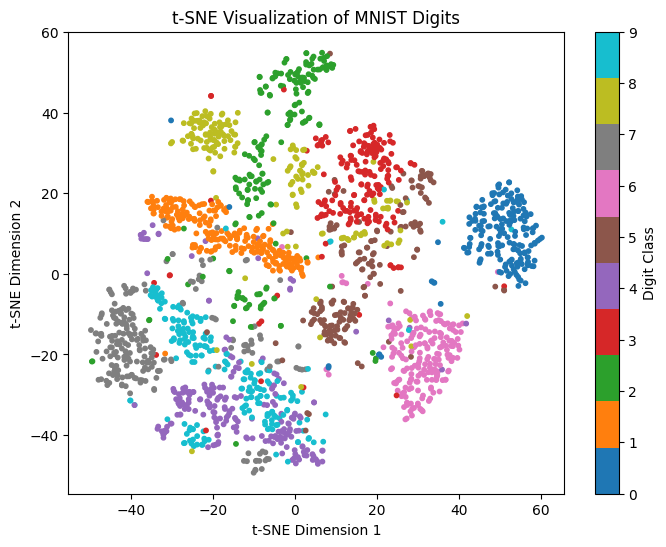

In [8]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y_subset,
    cmap="tab10",
    s=10
)

plt.colorbar(scatter, label="Digit Class")
plt.title("t-SNE Visualization of MNIST Digits")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


## Reflection
- Do clusters correspond to labels?
Yes, in many cases the clusters formed by t-SNE correspond to class labels. This happens because t-SNE preserves local neighborhood relationships, meaning similar data points remain close together in the low-dimensional embedding. For MNIST, images of the same digit share similar pixel patterns, so they naturally form clusters. However, this correspondence is visual, not guaranteed, and should not be interpreted as true class separability in the original space.


- Why should t-SNE not be used for training models?
t-SNE is designed for visualization, not learning. It distorts global distances and does not preserve the true geometric structure of the data. The embeddings are non-deterministic, non-linear, and cannot be meaningfully applied to unseen data. Because classifiers rely on consistent decision boundaries, using t-SNE embeddings for training leads to poor generalization and unstable performance.
